In [2]:
import numpy as np
import pandas as pd
import webbrowser
import matplotlib.colors
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [73]:
#Global object used to create local blok representations within a players 'hand'
pieces = {
    'L5' : [[1,1,1,1],[0,0,0,1]],
    'Y'  : [[1,1,1,1],[0,1,0,0]],
    'N'  : [[1,1,1,1],[0,0,1,1]],
    'U'  : [[1,1],[1,0],[1,1]],
    'V3' : [[1,0],[1,1]],
    'V5' : [[1,0,0],[1,0,0],[1,1,1]],
    'Z5' : [[1,1,0],[0,1,0],[0,1,1]],
    'X'  : [[0,1,0],[1,1,1],[0,1,0]],
    'T5' : [[1,1,1],[0,1,0],[0,1,0]],
    'W'  : [[1,0,0],[1,1,0],[0,1,1]],
    'P'  : [[1,1],[1,1],[1,0]],
    'F'  : [[0,1,1],[1,1,0],[0,1,0]],
    'O4' : [[1,1],[1,1]],
    'L4' : [[1,1,1],[0,0,1]],
    'T4' : [[1,1,1],[0,1,0]],
    'Z4' : [[1,1,0],[0,1,1]],
    'I2' : [[1,1]],
    'I3' : [[1,1,1]],
    'I4' : [[1,1,1,1]],
    'I5' : [[1,1,1,1,1]]
    }

x = np.array([[1,1]])
print len(x.shape)#[0]

2


In [128]:
class Blok:
    def __init__(self, blockName):
        self.name = blockName
        self.kernel = np.array(copy.deepcopy(pieces[blockName]))
        
    def __cmp__(self, other):
        #Magic method for comparison. Lets block class compare itself to Bloks and strings.
        #Can define more specific comparisons, but since I'm lazy, blocks are ALWAYS less than 
        #other python objects not in (blok, string)
        if type(other) is str:
            if other == self.name:
                return 0
            else:
                return -1
        elif type(other) is Blok:
            if other.name == self.name:
                return 0
            else:
                return -1
        else:
            return -1
            
    def __str__(self):
        return self.name
    
    def __repr__(self):
        return self.name
        #return self.name
        
    def show(self, verbose=False):
        if verbose:
            plt.figure(self.name)
            colors = matplotlib.colors.ListedColormap(['gray','red','yellow','blue','green'])
    #         if len(self.kernel.shape) > 1:
            plt.pcolormesh(range(self.kernel.shape[1]+1),range(self.kernel.shape[0]+1),self.kernel,edgecolors='black',cmap=colors)
    #         else:
    #             plt.pcolormesh(range(2),range(self.kernel.shape[0]+1),self.kernel,edgecolors='black',cmap=colors)
            print "[", self.name
            plt.show()
            print "]"
            plt.clf()
        else:
            print "[", self.name, "]"

    def rotate(self, iterate=1):
        for i in range(iterate):
            self.kernel = np.rot90(self.kernel)
    
    def flip(self):
        self.kernel = np.transpose(self.kernel)

In [91]:
#lets remove this SHITTY class.
class Point:    
    def __init__(self, x, y):
        self.x = _x
        self.y = _y

In [122]:
class Player:
    def __init__(self, playerName, playerID):
        self.name = playerName
        self.pID = playerID/4.0
        #On initalization, create a new list of blokx
        self.pieceList = self.generatePieces()
        
    def generatePieces(self):
        #I'm so sorry... It's a dictionary of BlokName: BlokObject 
        retDict = {}
        for piece in pieces.keys():
            retDict[piece] = Blok(piece)
            #retList.append(Blok(piece))
        return retDict
        
    def playPiece(self, piece):
        if piece in self.pieceList:
            retPiece = self.pieceList.pop(piece, None)
            return True, retPiece.kernel
        else:
            print(str(self.name) + ' has no piece \'' + str(piece) + '\'')
            return False, None

    def showHand(self):
        for piece in self.pieceList.values():
            piece.show()
    
    #Huehuehue I love magic methods
    def __len__(self):
        return len(self.pieceList.keys())
    
#     def __missing__(self, key):
#         print "Piece ", key, " is not in ", self.name, "'s hand."
#         return False

    def __getitem__(self, key):
        # if key is of invalid type or value, the list values will raise the error
        return self.pieceList[key]

    def __setitem__(self, key, value):
        self.pieceList[key] = value

    def __delitem__(self, key):
        del self.pieceList[key]



In [129]:
##Testing Block, not production code
daniel = Player('Daniel',1)
print daniel.showHand()
daniel.playPiece('Z4')
print daniel.showHand()
daniel.playPiece('foo')
print daniel.pieceList['I5']
print daniel['I5']

[ T5 ]
[ Y ]
[ F ]
[ T4 ]
[ I2 ]
[ I5 ]
[ I4 ]
[ L5 ]
[ N ]
[ P ]
[ L4 ]
[ V3 ]
[ U ]
[ V5 ]
[ W ]
[ Z5 ]
[ Z4 ]
[ X ]
[ O4 ]
[ I3 ]
None
[ T5 ]
[ Y ]
[ F ]
[ T4 ]
[ I2 ]
[ I5 ]
[ I4 ]
[ L5 ]
[ N ]
[ P ]
[ L4 ]
[ V3 ]
[ U ]
[ V5 ]
[ W ]
[ Z5 ]
[ X ]
[ O4 ]
[ I3 ]
None
Daniel has no piece 'foo'
I5
I5


In [123]:
class Board:
    def __init__(self, **kwargs):
        self.boardState = kwargs.get('BoardState', pd.DataFrame(np.zeros((20,20))))
        self.boardState.index = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t']

    def addPiece(self, player, piece, (x,y)):
        #kernel = np.array(pieces[piece])*player.pID
        canPlay, kernel = player.playPiece(piece)
        if canPlay:
            kernel = kernel * player.pID
            #One is welcome to imagine an implementation that uses the Point class
            #One is welcome to imagine many things
            #One is the loneliest number
            self.boardState.iloc[x:x+kernel.shape[0],y:y+kernel.shape[1]] = kernel
        else:
            print('Matt please teach me how to create exceptions in python')
            
    def printBoard(self):
        colors = matplotlib.colors.ListedColormap(['gray','red','yellow','blue','green']) #working sort of kind of as intended
        plt.figure(figsize=(10,10))
        plt.pcolormesh(range(21),range(21),game1.boardState,edgecolors='black',cmap=colors)
        labels = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t']
        plt.xticks(range(1,21),labels)
        plt.yticks(range(1,21))
        plt.show()
            

In [124]:
class Matt:
    def __init__(self):
        self.IsGoodLad = True
        self.WorksRealHard = True
    def writeSomeCode(self):
        for i in range(100):
            webbrowser.open('https://www.youtube.com/watch?v=ZZ5LpwO-An4', new=0, autoraise=True)
    

In [30]:
Kerner = Matt()
Kerner.writeSomeCode()

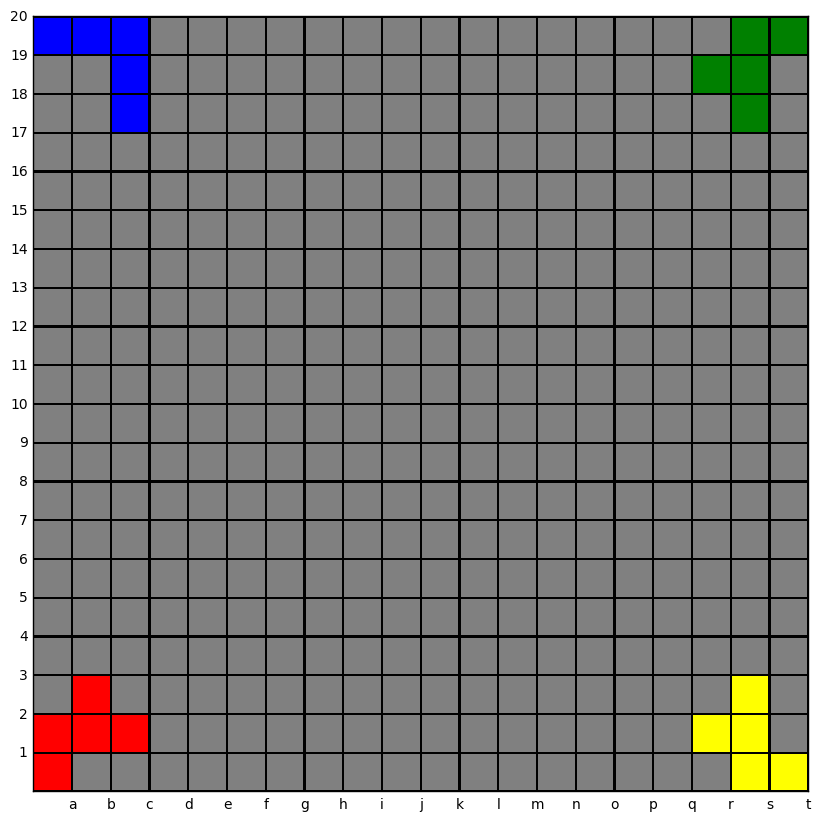

In [127]:
##Testing block, not production code (lol, "production," "code")
daniel = Player('Daniel', 1)
matt = Player('Matt', 2)
anthony = Player('Anthony', 3)
jay = Player('Jay Lee', 4)
game1 = Board()

daniel['F'].rotate()
game1.addPiece(daniel, 'F', (0, 0))
#print game1.boardState
anthony['V5'].rotate()
game1.addPiece(anthony, 'V5', (17, 0))

# matt['F'].rotate()
# matt['F'].flip()
game1.addPiece(matt, 'F', (0, 17))

jay['F'].flip()
jay['F'].rotate()
game1.addPiece(jay, 'F', (17, 17))

game1.printBoard()


???? fuck it for now